# Heart Disease Prediction

## About the dataset :

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

## Attribute Information : 

1) Age: age of the patient [years]

2) Sex: sex of the patient [M: Male, F: Female]

3) ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

4) RestingBP: resting blood pressure [mm Hg]

5) Cholesterol: serum cholesterol [mm/dl]

6) FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

7) RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality 
    (T wave inversions and/or ST    elevation or depression of > 0.05 mV), LVH: showing probable or definite left 
     ventricular hypertrophy by Estes' criteria]

8) MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

9)  ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

10) Oldpeak: oldpeak = ST [Numeric value measured in depression]

11) ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

12) HeartDisease: output class [1: heart disease, 0: Normal]

##  Importing the libaries :

In [1]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Reading the data : 

In [2]:
h=pd.read_csv("C:/Users/HP/Downloads/heart.csv")
h

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## EDA

In [3]:
h.shape

(918, 12)

In [4]:
h.size

11016

In [5]:
h.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
h.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [7]:
# columns in dataframe
h.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [8]:
# Now we can display all columns and their datatypes
h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
# Descriptive statistics for all numeric columns
h.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [10]:
# Checking unique values in columns
h.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [11]:
h.loc[(h.Sex=="M")&(h.HeartDisease==1),["Sex","HeartDisease"]]

,Sex,HeartDisease
8,M,1
11,M,1
13,M,1
16,M,1
18,M,1
...,...,...
908,M,1
911,M,1
913,M,1
914,M,1


In [12]:
h.loc[(h.Sex=="F")&(h.HeartDisease==1),["Sex","HeartDisease"]]

,Sex,HeartDisease
1,F,1
3,F,1
41,F,1
51,F,1
102,F,1
115,F,1
117,F,1
120,F,1
123,F,1
144,F,1


## Cheaking Missing value & Duplicated value

In [13]:
# To checking missing values in data
h.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [14]:
# To checking duplicated values in data
h.duplicated().sum()

0

## Outlier Detection & Removing

<AxesSubplot: >

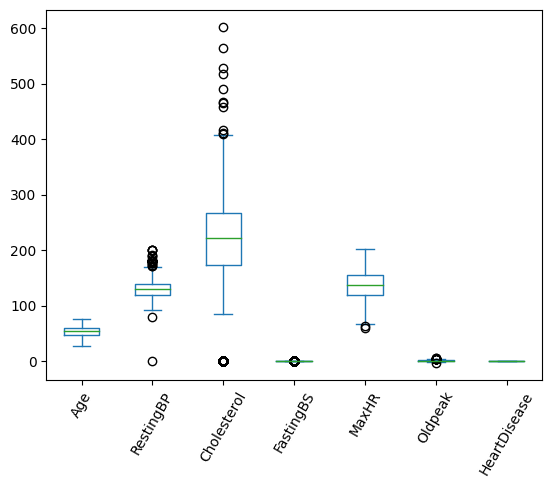

In [15]:
# Checking Outlier
h.plot(kind="box",rot=60)

Age                AxesSubplot(0.125,0.747241;0.133621x0.132759)
RestingBP       AxesSubplot(0.285345,0.747241;0.133621x0.132759)
Cholesterol      AxesSubplot(0.44569,0.747241;0.133621x0.132759)
FastingBS       AxesSubplot(0.606034,0.747241;0.133621x0.132759)
MaxHR           AxesSubplot(0.766379,0.747241;0.133621x0.132759)
Oldpeak            AxesSubplot(0.125,0.587931;0.133621x0.132759)
HeartDisease    AxesSubplot(0.285345,0.587931;0.133621x0.132759)
dtype: object

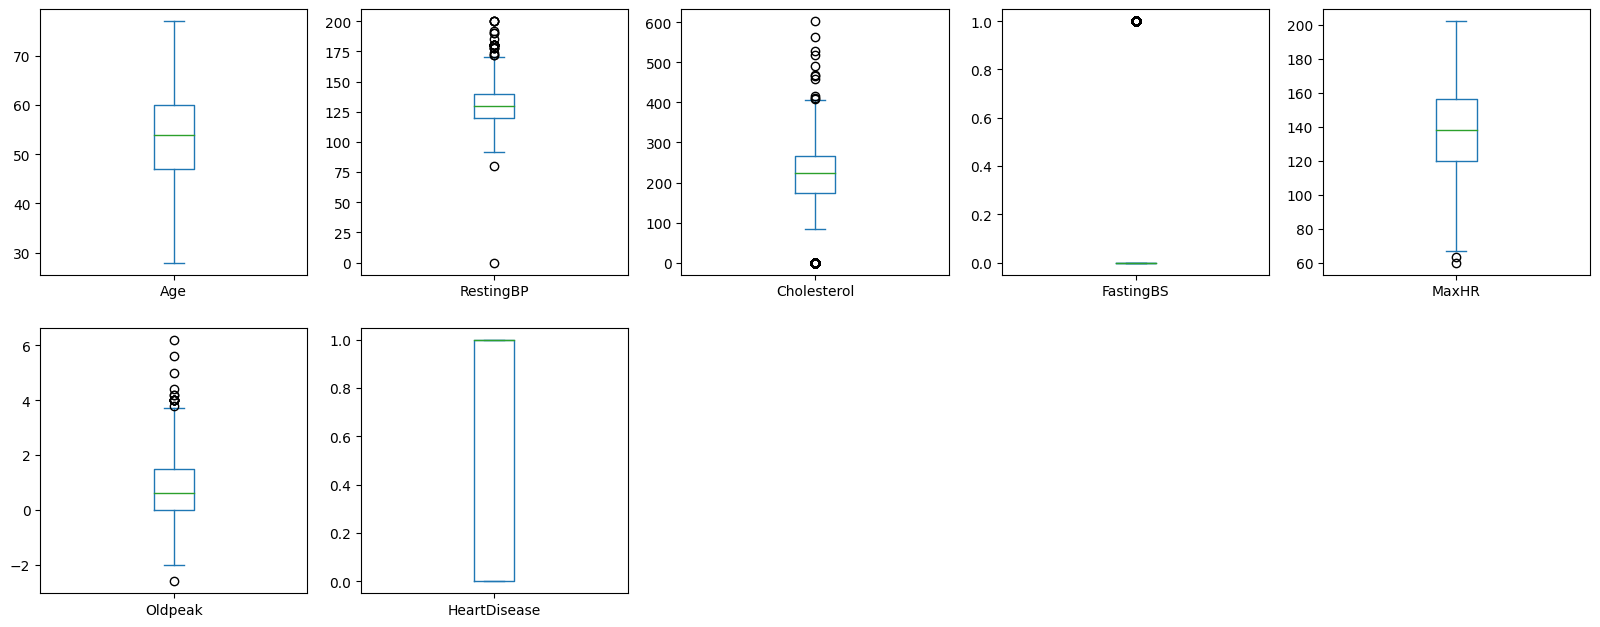

In [16]:
h.plot(kind="box",subplots=True,sharex=False,sharey=False,layout=(5,5),figsize=(20,20))

In [17]:
# Removing Outlier
h=h[(h.RestingBP < 175)&(h.RestingBP > 78)]
h=h[(h.Cholesterol<350)&(h.Cholesterol > 120)]
h=h[(h.Oldpeak <3)&(h.Oldpeak > -2)]
h=h[(h.Oldpeak > 0.8 )]

Age                AxesSubplot(0.125,0.747241;0.133621x0.132759)
RestingBP       AxesSubplot(0.285345,0.747241;0.133621x0.132759)
Cholesterol      AxesSubplot(0.44569,0.747241;0.133621x0.132759)
FastingBS       AxesSubplot(0.606034,0.747241;0.133621x0.132759)
MaxHR           AxesSubplot(0.766379,0.747241;0.133621x0.132759)
Oldpeak            AxesSubplot(0.125,0.587931;0.133621x0.132759)
HeartDisease    AxesSubplot(0.285345,0.587931;0.133621x0.132759)
dtype: object

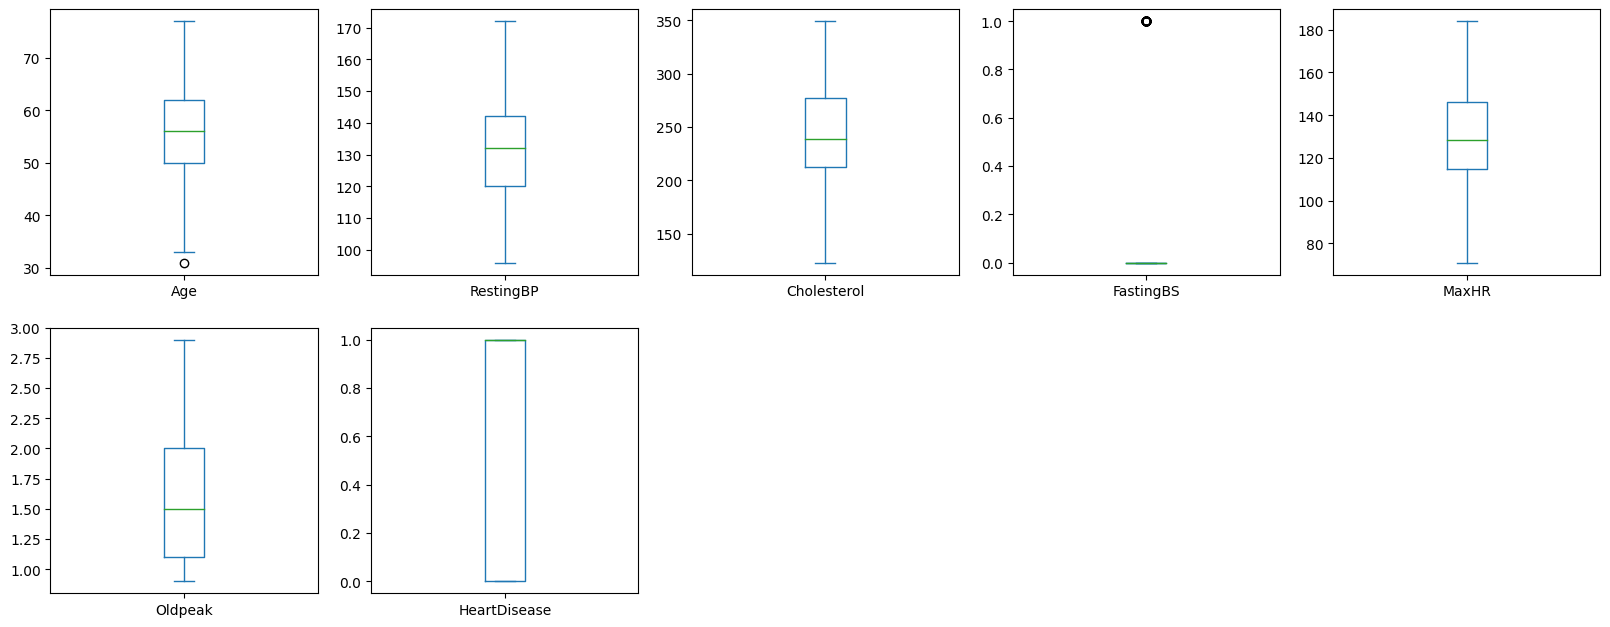

In [18]:
h.plot(kind="box",subplots=True,sharex=False,sharey=False,layout=(5,5),figsize=(20,20))

## Data Visulization

[]

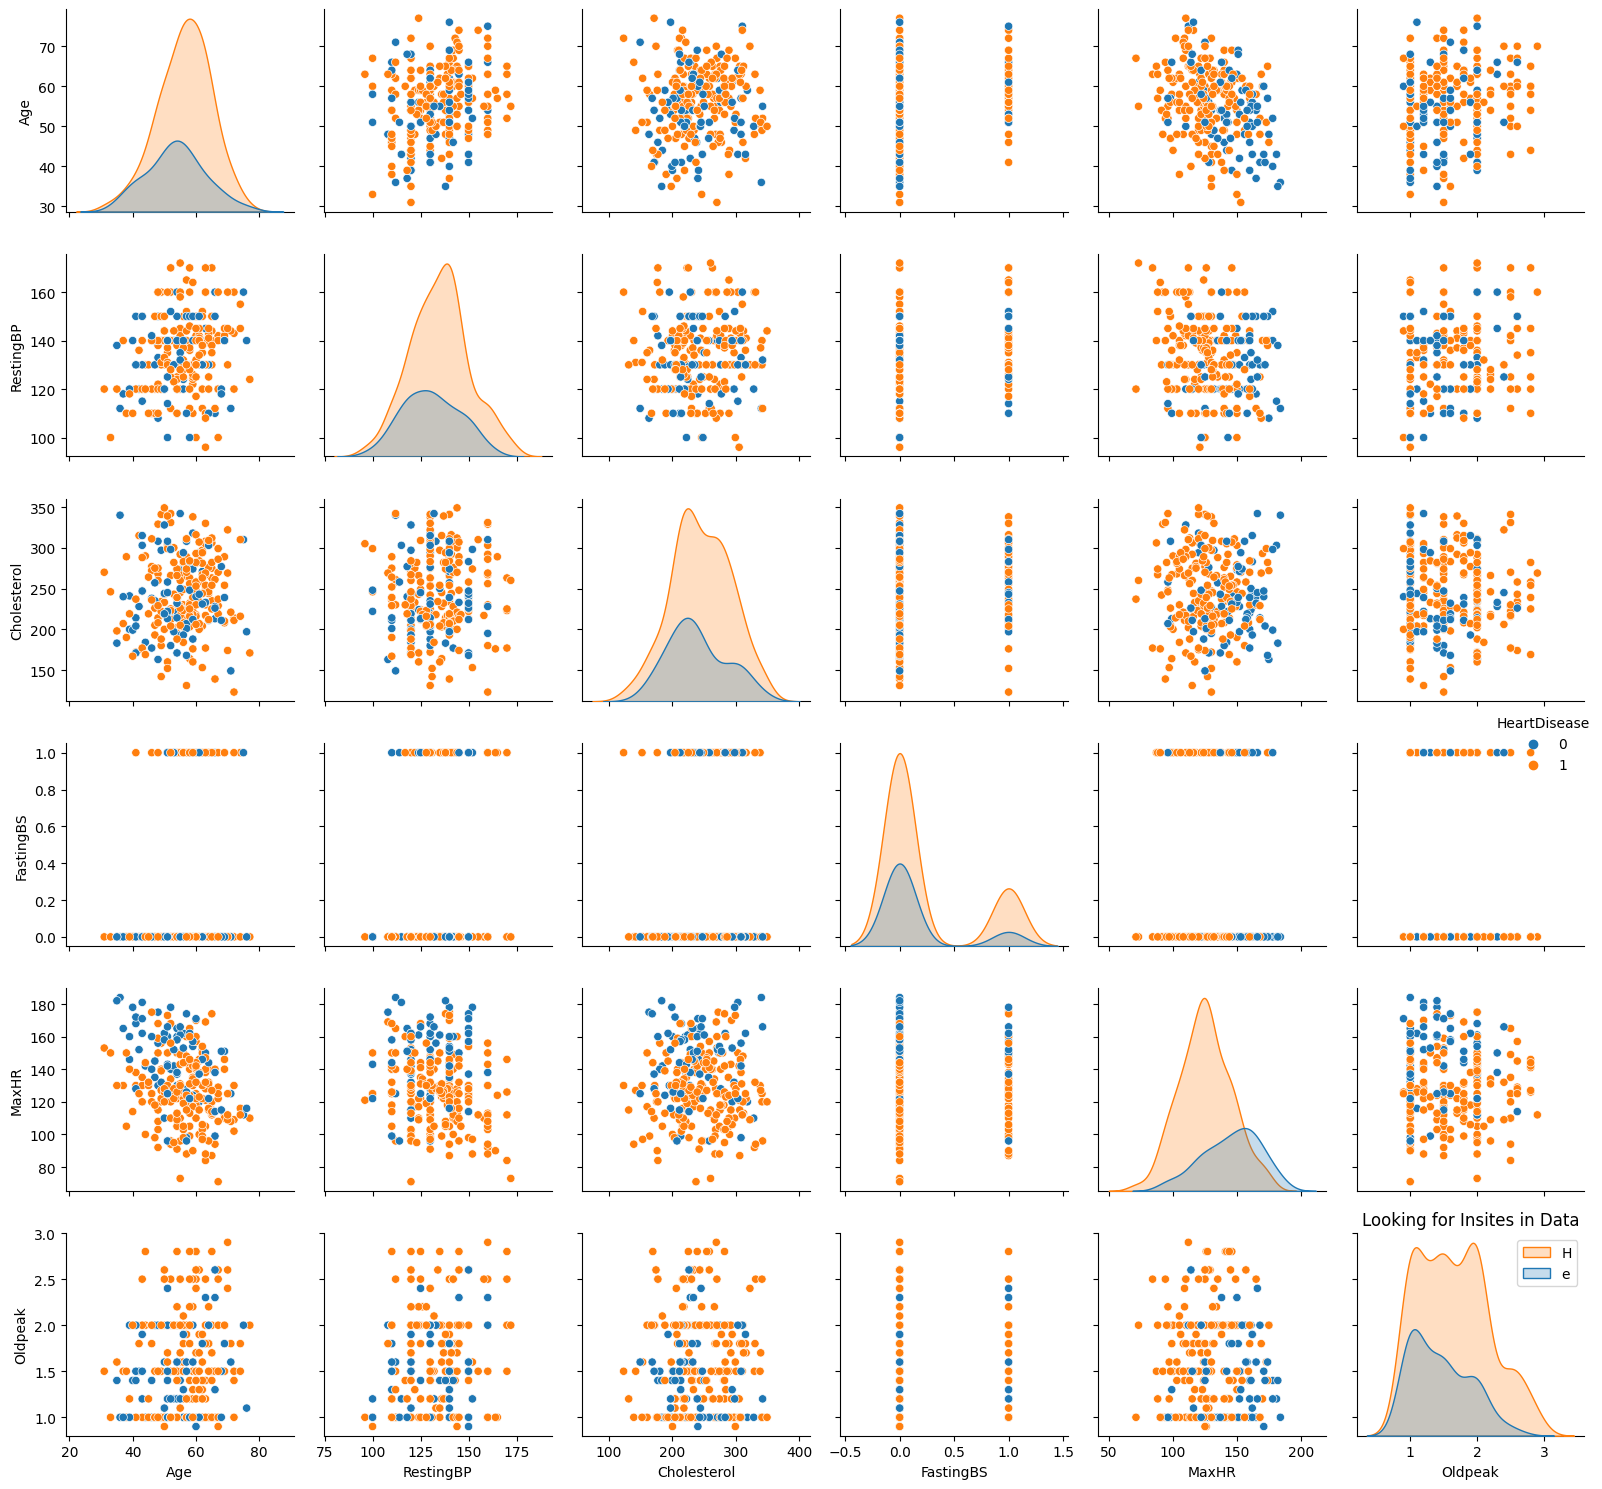

In [19]:
# To plot multiple pairwise bivariate distributions in a dataset
sns.pairplot(h,hue="HeartDisease")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

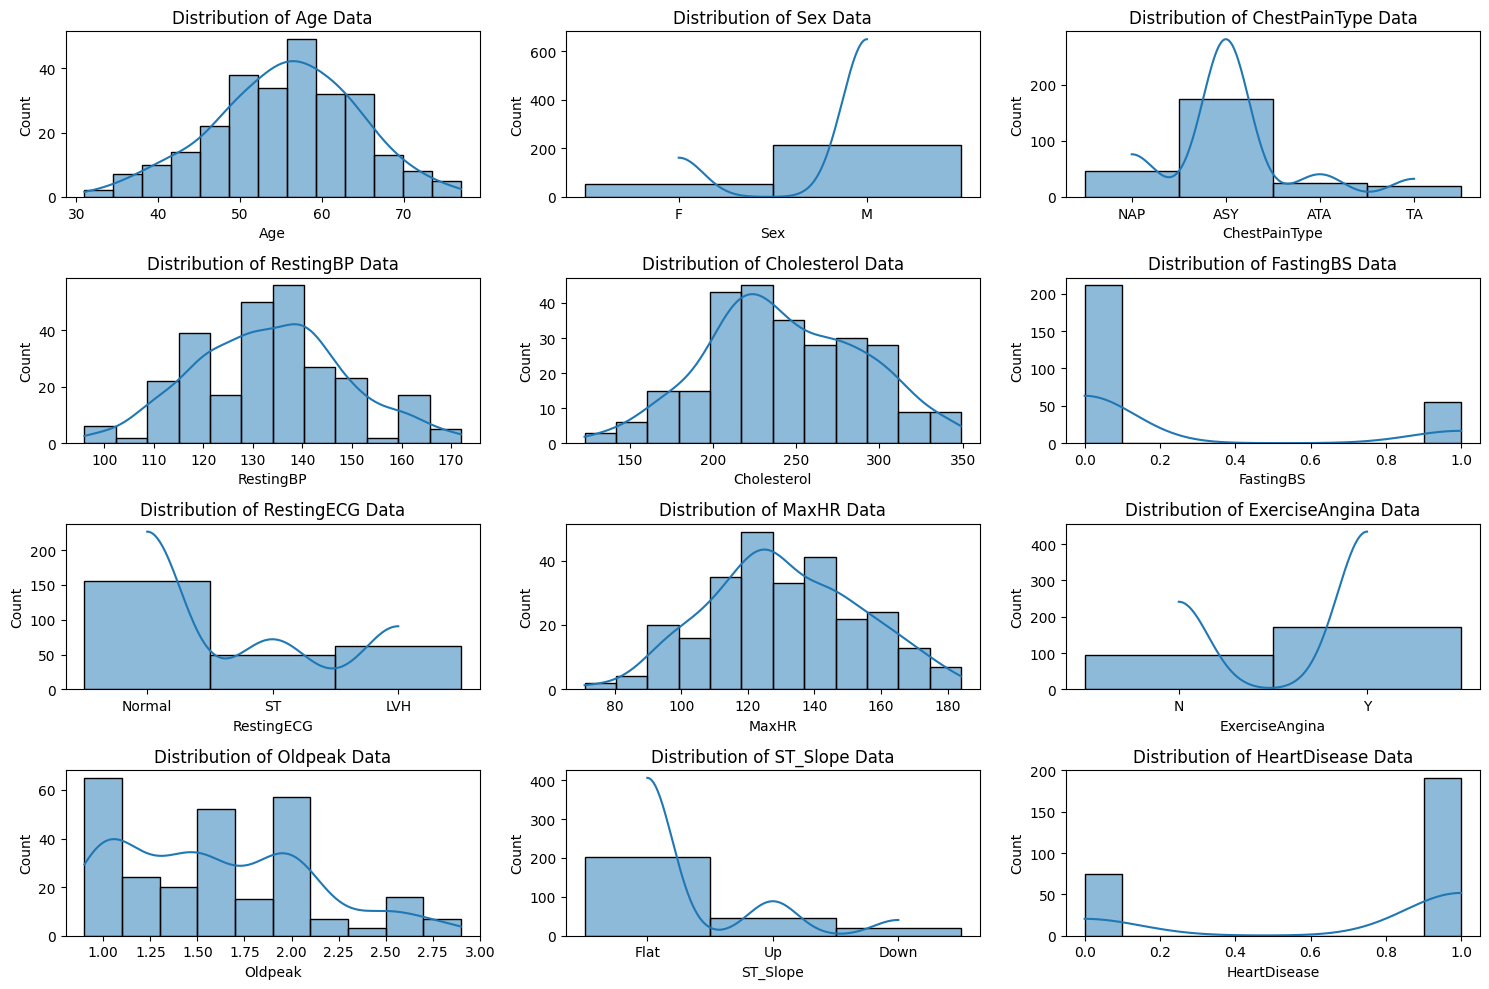

In [20]:
plt.figure(figsize=(15,10))
for i,col in enumerate(h.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(h[col],kde=True)
    plt.tight_layout()
    plt.plot()

In [21]:
# Checking Multicollinearity
h.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.229222,0.047282,0.194887,-0.304623,0.144851,0.138748
RestingBP,0.229222,1.000000,0.037089,0.232444,-0.170562,0.139938,0.125556
Cholesterol,0.047282,0.037089,1.000000,0.062129,-0.016174,-0.053576,0.057822
FastingBS,0.194887,0.232444,0.062129,1.000000,-0.041820,-0.022252,0.092993
MaxHR,-0.304623,-0.170562,-0.016174,-0.041820,1.000000,-0.034473,-0.400037
Oldpeak,0.144851,0.139938,-0.053576,-0.022252,-0.034473,1.000000,0.180431
HeartDisease,0.138748,0.125556,0.057822,0.092993,-0.400037,0.180431,1.000000


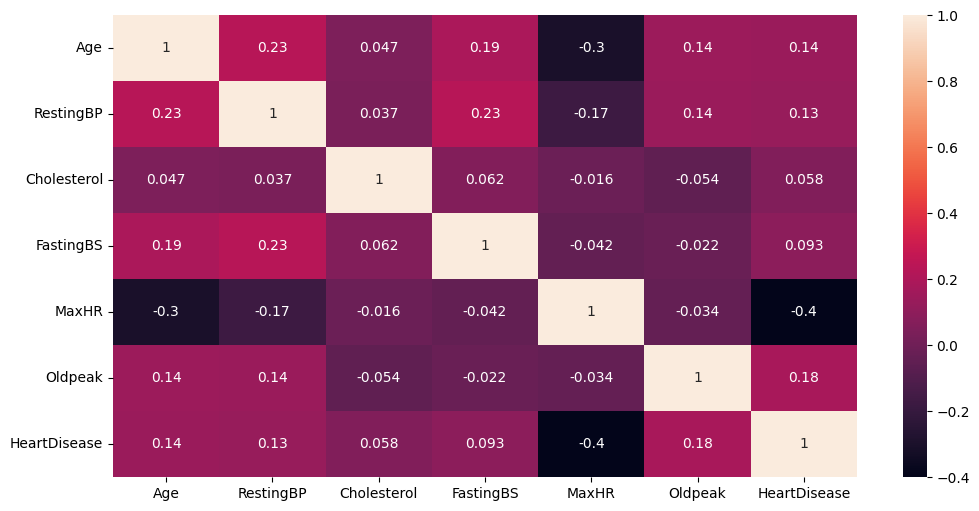

In [22]:
plt.figure(figsize = (12,6))
sns.heatmap(h.corr(),annot=True)
plt.show()

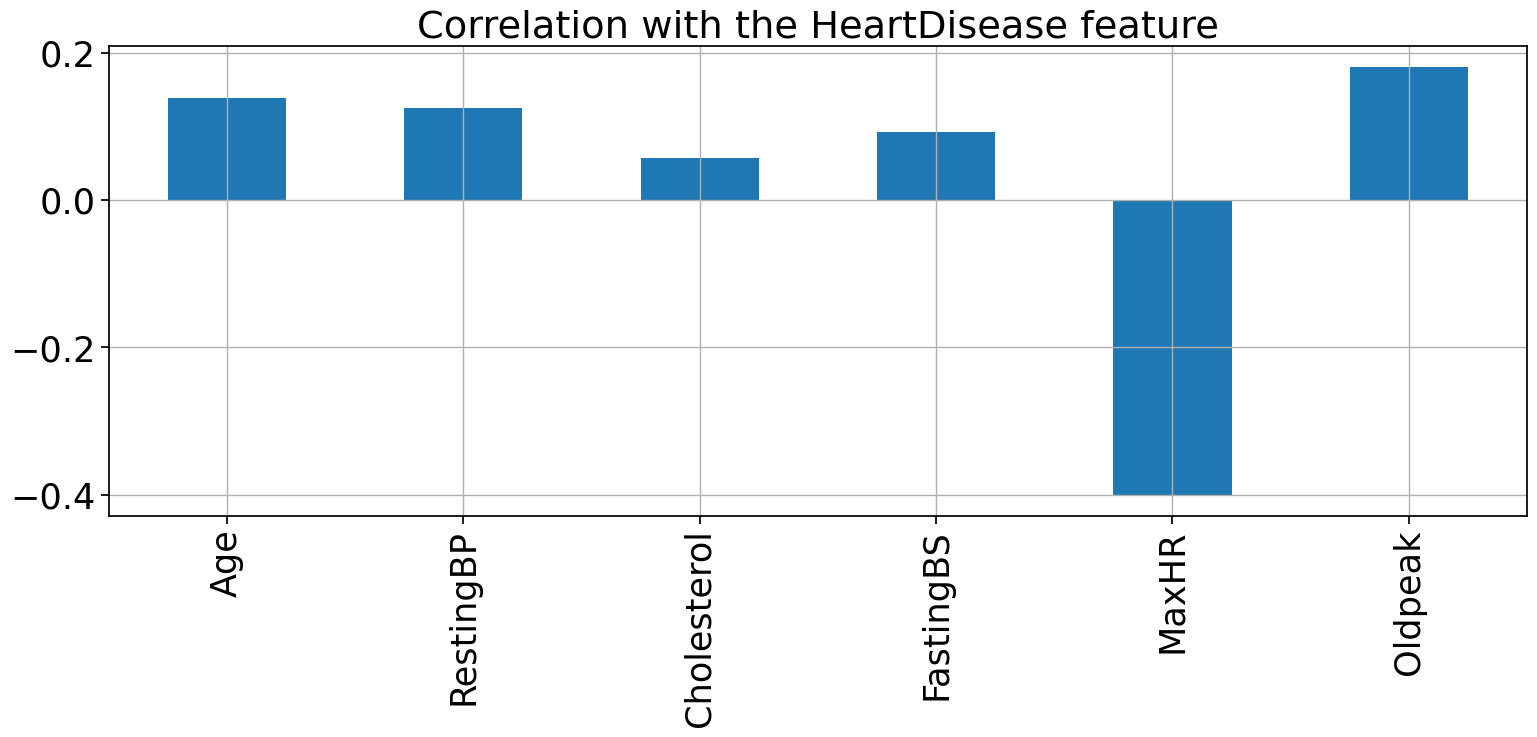

In [23]:
# Checking Correlation with HeartDisease
sns.set_context('notebook',font_scale = 2.3)
h.drop('HeartDisease', axis=1).corrwith(h.HeartDisease).plot(kind='bar', grid=True, figsize=(16,8), 
                                                        title="Correlation with the HeartDisease feature")
plt.tight_layout()

#### - One Feature "MaxHR" are negatively correlated with the HeartDisease Feature .

#### - Others are positively correlated with HeartDisease Feature. 

### Analysis of Age  

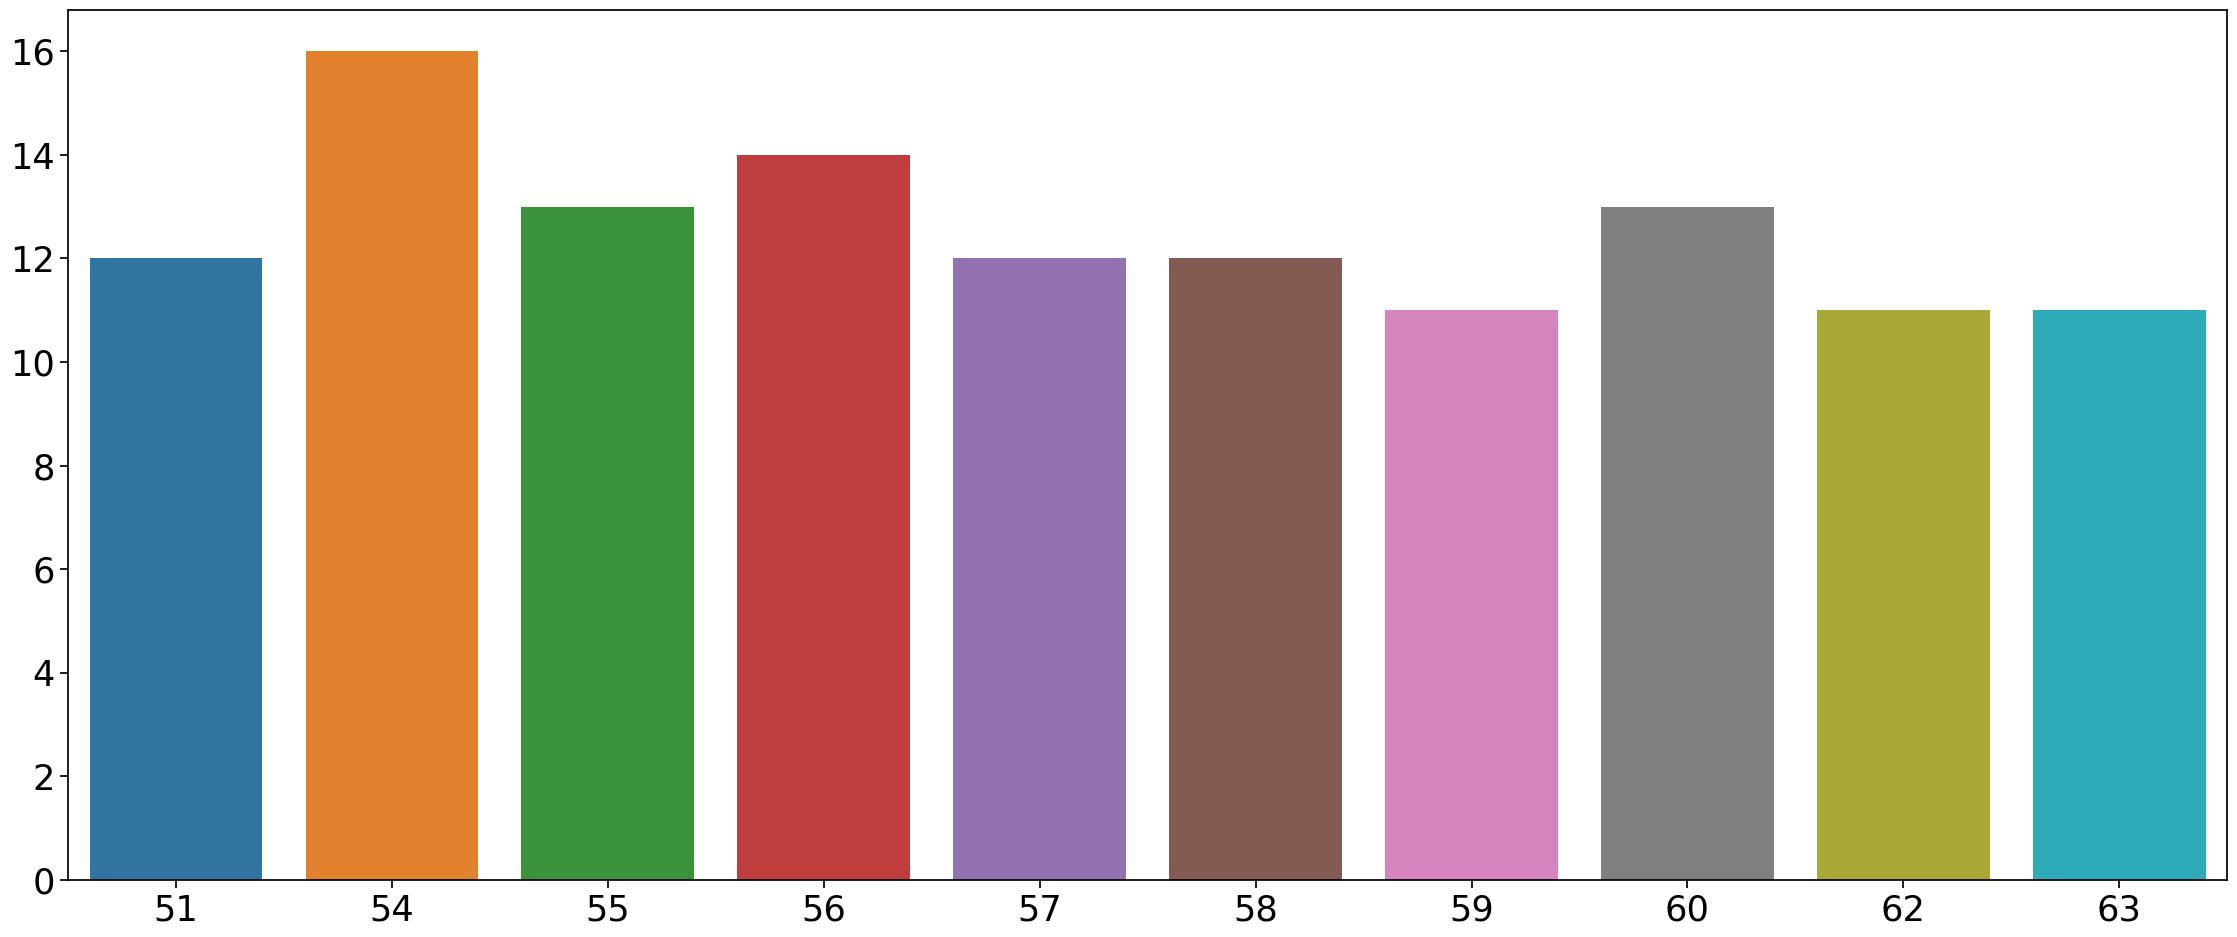

In [24]:
# Here we will be checking the 10 ages and their counts
plt.figure(figsize=(23,10))
sns.barplot(x=h.Age.value_counts()[:10].index,y=h.Age.value_counts()[:10].values)
plt.tight_layout()

#### - Here we can see that 54 age column has the highest frequency 

In [25]:
#To check range of age in the dataset
minAge=min(h.Age)
maxAge=max(h.Age)
meanAge=h.Age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 31
Max Age : 77
Mean Age : 55.567669172932334


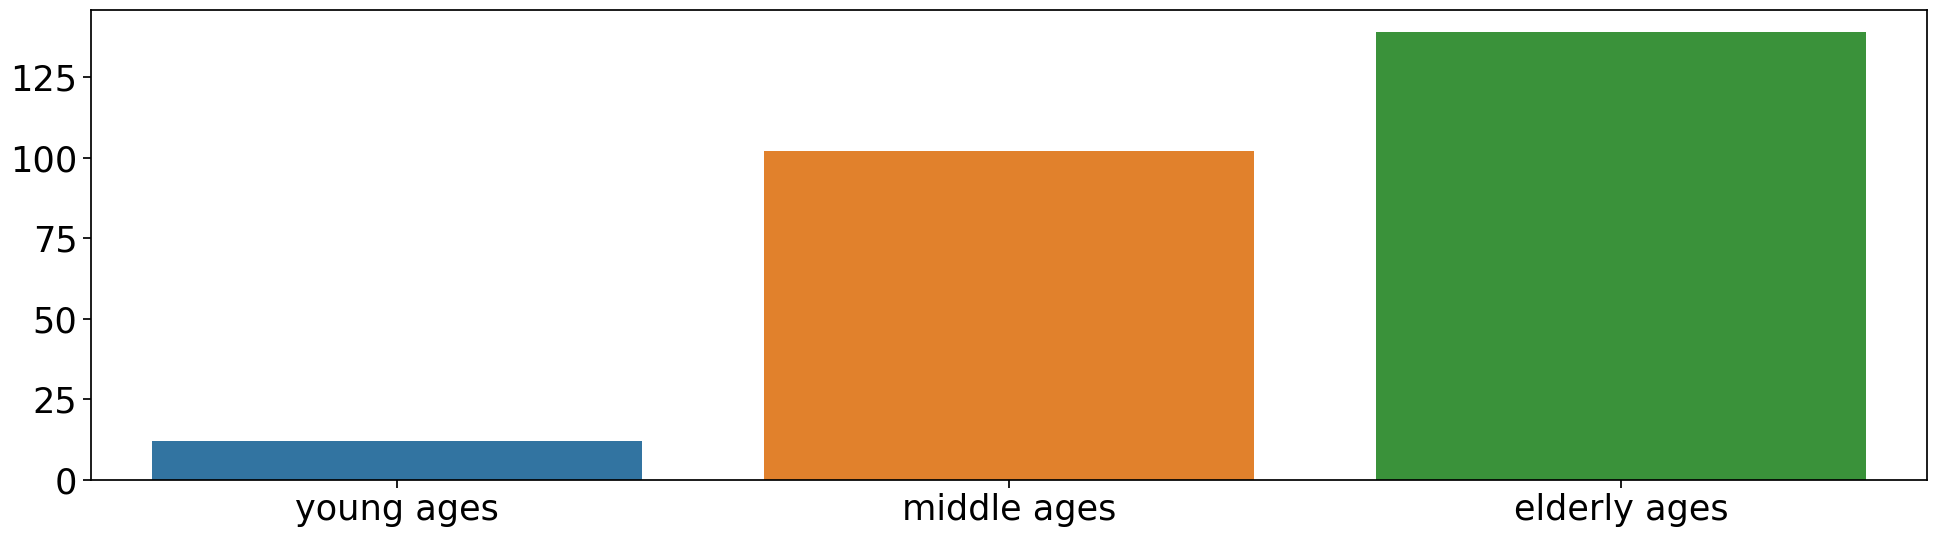

In [26]:
# Divide the Age feature into three parts- "Young", "Middle" and "Elder"
Young = h[(h.Age>=29)&(h.Age<40)]
Middle =h[(h.Age>=40)&(h.Age<55)]
Elder = h[(h.Age>55)]

plt.figure(figsize=(20,6))
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(Young),len(Middle),len(Elder)])
plt.tight_layout()

#### - Here we can see that elder people are the most affected by heart disease & young ones are the least affected. 

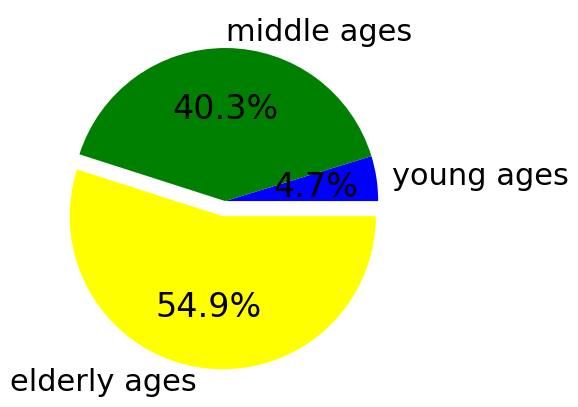

In [27]:
# To prove the above inference we plot pie chart
colors = ['blue','green','yellow']
explode = [0,0,0.1]
plt.figure(figsize=(6,6))
sns.set_context('notebook',font_scale = 2.0)
plt.pie([len(Young),len(Middle),len(Elder)],labels=['young ages','middle ages','elderly ages'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.tight_layout()

### ***Plot --> Sex***

<AxesSubplot: xlabel='Sex', ylabel='count'>

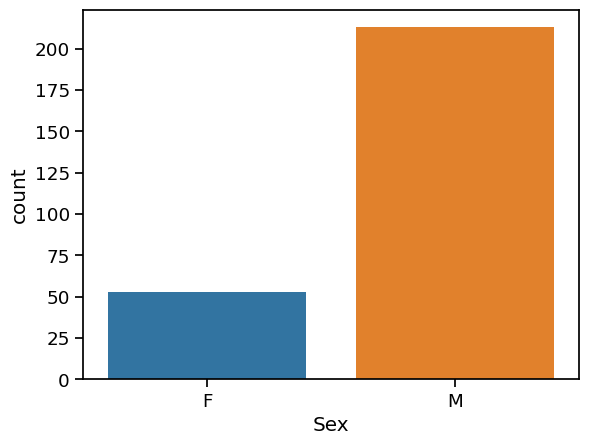

In [28]:
sns.set_context('notebook',font_scale = 1.2)
sns.countplot(data=h,x='Sex')

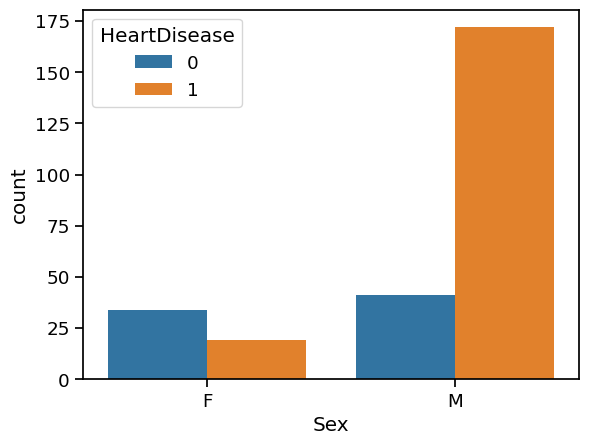

In [29]:
fig = sns.countplot(data=h, x='Sex', hue='HeartDisease')

### ***Plot --> ChestPainType*** 

<AxesSubplot: xlabel='ChestPainType', ylabel='count'>

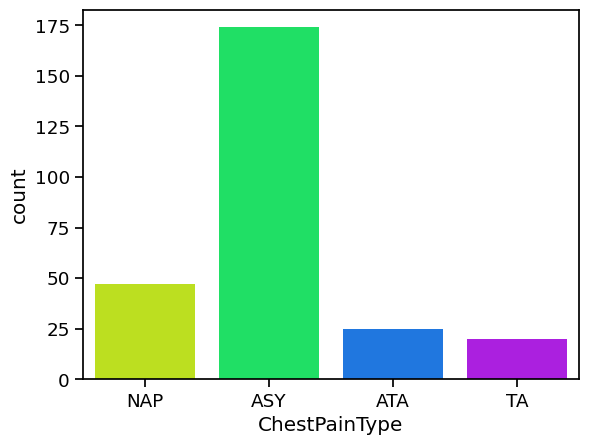

In [30]:
sns.countplot(data=h,x='ChestPainType',palette="hsv")

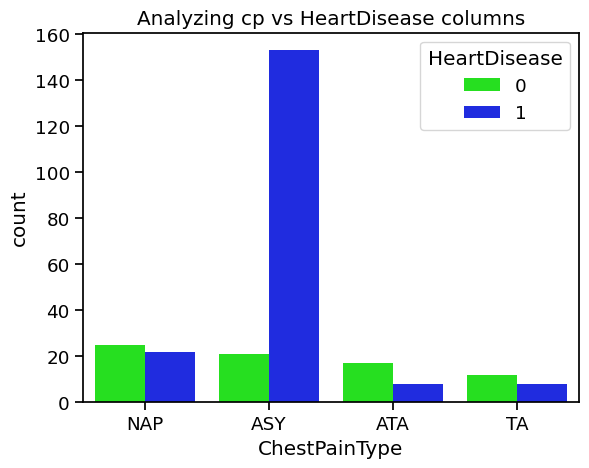

In [31]:

sns.countplot(x="ChestPainType",hue="HeartDisease",data=h,palette="hsv")
plt.title("Analyzing cp vs HeartDisease columns")
plt.show()

### ***Plot --> FastingBS*** 

<AxesSubplot: xlabel='FastingBS', ylabel='count'>

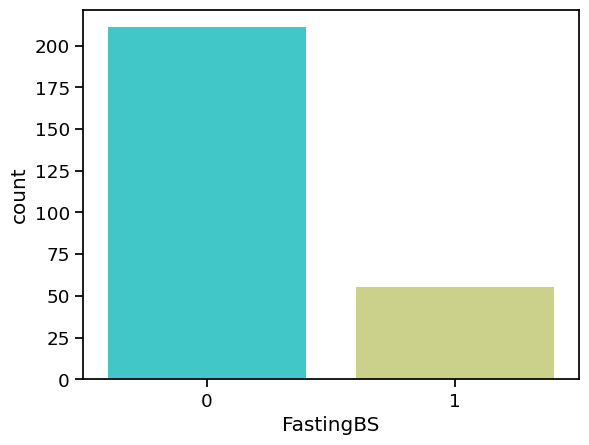

In [32]:
sns.countplot(data=h,x='FastingBS',palette="rainbow")

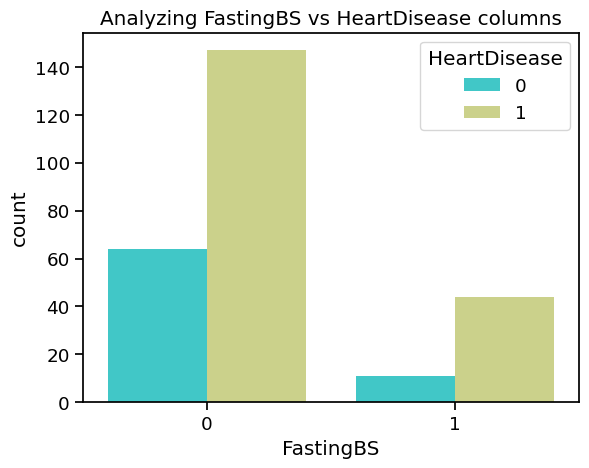

In [33]:
sns.countplot(x="FastingBS",hue="HeartDisease",data=h,palette="rainbow")
plt.title("Analyzing FastingBS vs HeartDisease columns")
plt.show()

## ***Plot --> RestingECG*** 

<AxesSubplot: xlabel='RestingECG', ylabel='count'>

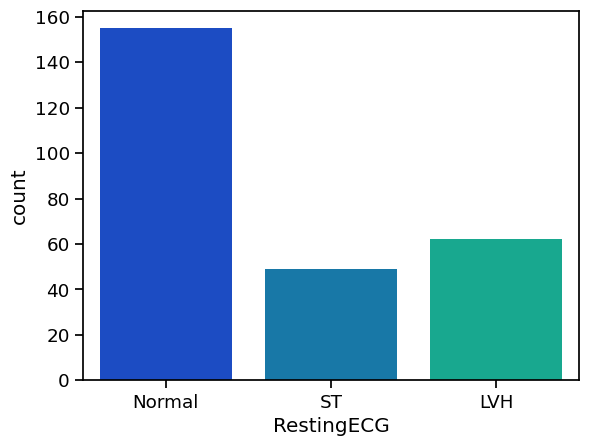

In [34]:
sns.countplot(data=h,x='RestingECG',palette="winter")

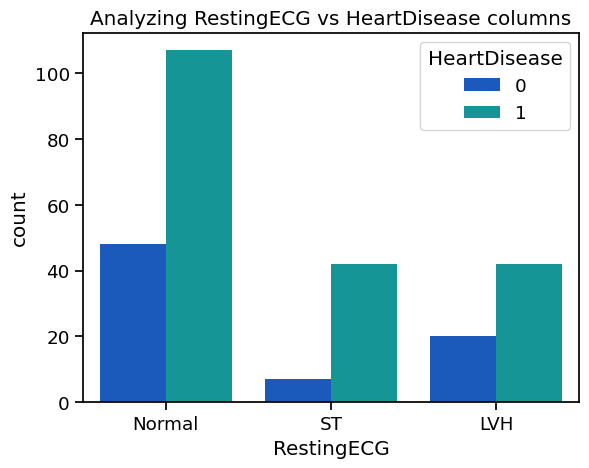

In [35]:
sns.countplot(x="RestingECG",hue="HeartDisease",data=h,palette="winter")
plt.title("Analyzing RestingECG vs HeartDisease columns")
plt.show()

### ***Plot --> ExerciseAngina*** 

<AxesSubplot: xlabel='ExerciseAngina', ylabel='count'>

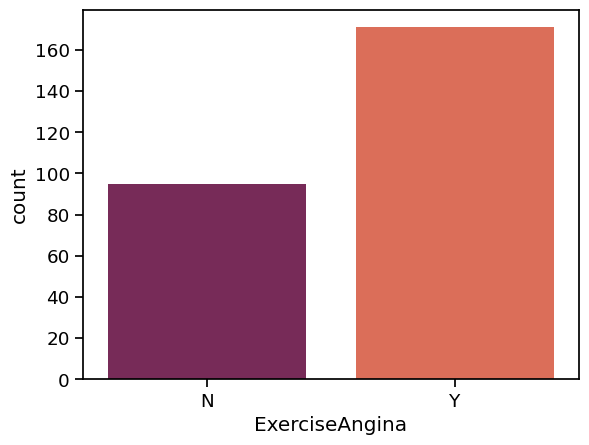

In [36]:
sns.countplot(data=h,x="ExerciseAngina",palette="rocket")

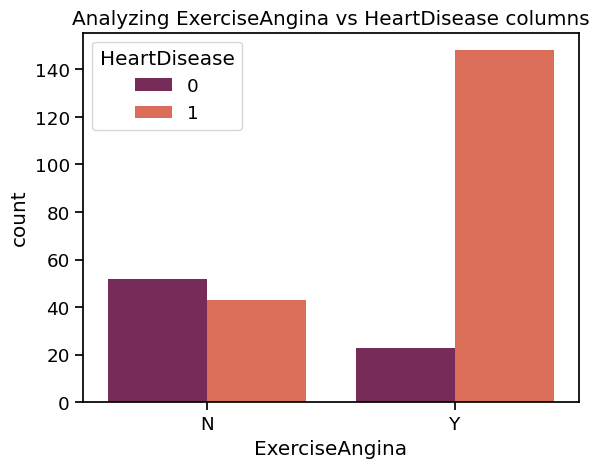

In [37]:
sns.countplot(x="ExerciseAngina",hue="HeartDisease",data=h,palette="rocket")
plt.title("Analyzing ExerciseAngina vs HeartDisease columns")
plt.show()

### ***Plot --> ST_Slope*** 

<AxesSubplot: xlabel='ST_Slope', ylabel='count'>

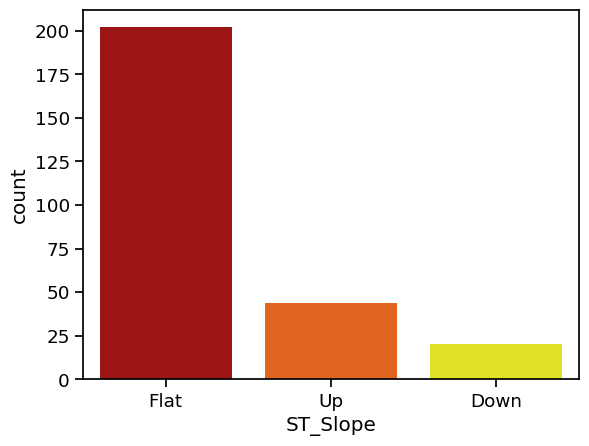

In [38]:
sns.countplot(data=h,x="ST_Slope",palette="hot")

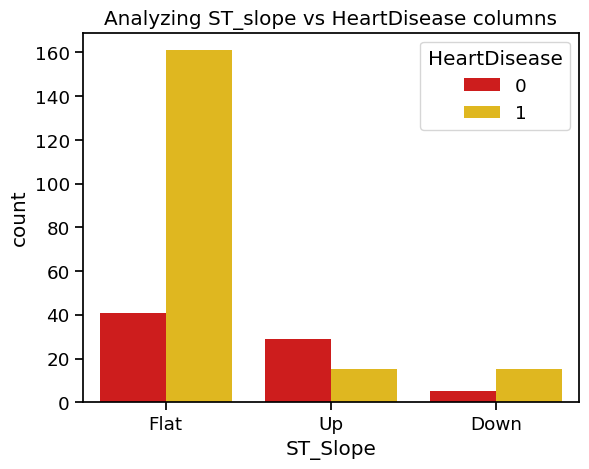

In [39]:
sns.countplot(x="ST_Slope",hue="HeartDisease",data=h,palette="hot")
plt.title("Analyzing ST_slope vs HeartDisease columns")
plt.show()

### ***Plot --> Heart Disease*** 

Unique Value
 [1 0]
Value Counts
 1    191
0     75
Name: HeartDisease, dtype: int64


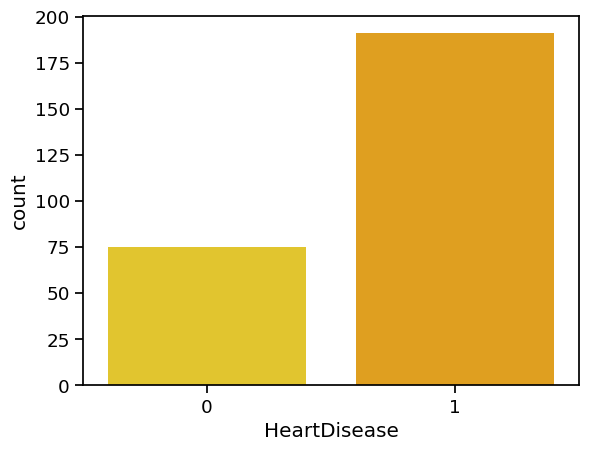

In [40]:
# Returns Unique Value and its count
print('Unique Value\n',h['HeartDisease'].unique())
print('Value Counts\n',h['HeartDisease'].value_counts())
# Count Plot of Stroke
sns.countplot(data=h,x='HeartDisease',palette="Wistia");

## Label Encoding

In [41]:
lst=[]
for i in h.columns:
    if h[i].dtype=="O":
        lst.append(i)
        
lst

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [42]:
for col in lst:
    print(col)
    print(h[col].unique())
    print("Number of unique values",h[col].nunique())
    print("\n")

Sex
['F' 'M']
Number of unique values 2


ChestPainType
['NAP' 'ASY' 'ATA' 'TA']
Number of unique values 4


RestingECG
['Normal' 'ST' 'LVH']
Number of unique values 3


ExerciseAngina
['N' 'Y']
Number of unique values 2


ST_Slope
['Flat' 'Up' 'Down']
Number of unique values 3




In [43]:
 from sklearn.preprocessing import LabelEncoder

In [44]:
lb = LabelEncoder()

In [45]:
for i in lst :
    h[i] = lb.fit_transform(h[i])

In [46]:
h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266 entries, 1 to 915
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             266 non-null    int64  
 1   Sex             266 non-null    int32  
 2   ChestPainType   266 non-null    int32  
 3   RestingBP       266 non-null    int64  
 4   Cholesterol     266 non-null    int64  
 5   FastingBS       266 non-null    int64  
 6   RestingECG      266 non-null    int32  
 7   MaxHR           266 non-null    int64  
 8   ExerciseAngina  266 non-null    int32  
 9   Oldpeak         266 non-null    float64
 10  ST_Slope        266 non-null    int32  
 11  HeartDisease    266 non-null    int64  
dtypes: float64(1), int32(5), int64(6)
memory usage: 21.8 KB


In [47]:
h.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,0,2,160,180,0,1,156,0,1.0,1,1
3,48,0,0,138,214,0,1,108,1,1.5,1,1
8,37,1,0,140,207,0,1,130,1,1.5,1,1
11,58,1,1,136,164,0,2,99,1,2.0,1,1
13,49,1,0,140,234,0,1,140,1,1.0,1,1


## Splitting Data into Dependent & Independent Variable

In [48]:
x=h.drop(["HeartDisease"],axis=1)
y=h.HeartDisease

In [49]:
x.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
1,49,0,2,160,180,0,1,156,0,1.0,1
3,48,0,0,138,214,0,1,108,1,1.5,1
8,37,1,0,140,207,0,1,130,1,1.5,1
11,58,1,1,136,164,0,2,99,1,2.0,1
13,49,1,0,140,234,0,1,140,1,1.0,1


In [50]:
y.head()

1     1
3     1
8     1
11    1
13    1
Name: HeartDisease, dtype: int64

## Dealing with imbalance data

In [51]:
# Get the Heart Disease and Normal Dataset
heartdisease=h[h["HeartDisease"]==1]
normal=h[h["HeartDisease"]==0]

In [52]:
print(heartdisease.shape,normal.shape)

(191, 12) (75, 12)


### Balancing the target field 

We observed in HeartDiseases(target field) the data is imbalanced that is Heart Disease- 0 has around 75 and with 1 around 191 If we create a model with this, it will impact our model will only consider the majority we get always 1 has prediction. To overcome this we have to do Under-sampling or oversampling

I'm using Oversampling --> SMOTE method to balance the data,This will bring minority class equal to the majority class

In [53]:
import imblearn

In [54]:
from imblearn.combine import SMOTETomek

In [55]:
smk=SMOTETomek(random_state=42)

In [56]:
x_res,y_res=smk.fit_resample(x,y)

In [57]:
x_res.shape

(350, 11)

In [58]:
y_res.shape

(350,)

In [59]:
from collections import Counter

print("original dataset shape {}".format(Counter(y)))
print("Resampled dataset shape {}".format(Counter(y_res)))

original dataset shape Counter({1: 191, 0: 75})
Resampled dataset shape Counter({1: 175, 0: 175})


## Spliting data into train test

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.3, random_state=45)

In [62]:
x_train.shape,x_test.shape

((186, 11), (80, 11))

In [63]:
y_train.shape,y_test.shape

((186,), (80,))

## Scaling the data

In [64]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

# ML Models

## 1. Logistic Regression 

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score

In [66]:
model1=LogisticRegression()

In [67]:
model1.fit(x_train,y_train)

LogisticRegression()

In [68]:
y_pred=model1.predict(x_test)

In [69]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [70]:
accuracy_score(y_test,y_pred)

0.7375

In [71]:
confusion_matrix(y_test,y_pred)

array([[12, 16],
       [ 5, 47]], dtype=int64)

In [72]:
Random_State=[]
for i in range (0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    model1 = LogisticRegression()
    model1.fit(x_train,y_train)
    y_pred = model1.predict(x_test)
    Random_State.append(accuracy_score(y_test,y_pred))
    random_no = Random_State.index(max(Random_State))
    accuracy=max(Random_State)

max_iteration=[]
for i in range(0,1000,50):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=random_no)
    model1=LogisticRegression(max_iter=i)
    model1.fit(x_train,y_train)
    y_pred=model1.predict(x_test)
    max_iteration.append(accuracy_score(y_test,y_pred))
    accuracy=max(max_iteration)
    
print ("Random State Number :",random_no,',Accuracy Score :',accuracy)
print("Maximum iteration Number :",(max_iteration.index(max(max_iteration)))*50,",Accuracy Score:",accuracy)

Random State Number : 99 ,Accuracy Score : 0.9125
Maximum iteration Number : 50 ,Accuracy Score: 0.9125


In [73]:
precision_score(y_test,y_pred)

0.9117647058823529

In [74]:
recall_score(y_test,y_pred)

0.9841269841269841

## 2. Decision Tree Classifier 

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score 

In [76]:
dt = DecisionTreeClassifier()

In [77]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [78]:
y_pred1=dt.predict(x_test)

In [79]:
accuracy_score(y_test,y_pred1)

0.7

In [80]:
confusion_matrix(y_pred1,y_test)

array([[ 6, 13],
       [11, 50]], dtype=int64)

In [81]:
Random_State=[]
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    y_pred1=dt.predict(x_test)
    Random_State.append(accuracy_score(y_test,y_pred1))
    random_no=Random_State.index(max(Random_State))
    accuracy=max(Random_State)
print("Random State Number :",random_no,"Accuracy Score :",accuracy)

Random State Number : 55 Accuracy Score : 0.8375


In [82]:
precision_score(y_test,y_pred1)

0.8125

In [83]:
recall_score(y_test,y_pred1)

0.8253968253968254

In [84]:
h.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [85]:
feature_name=['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']
cn=["1","0"]

### Plotting Decision Tree 

In [86]:
from sklearn.tree import plot_tree

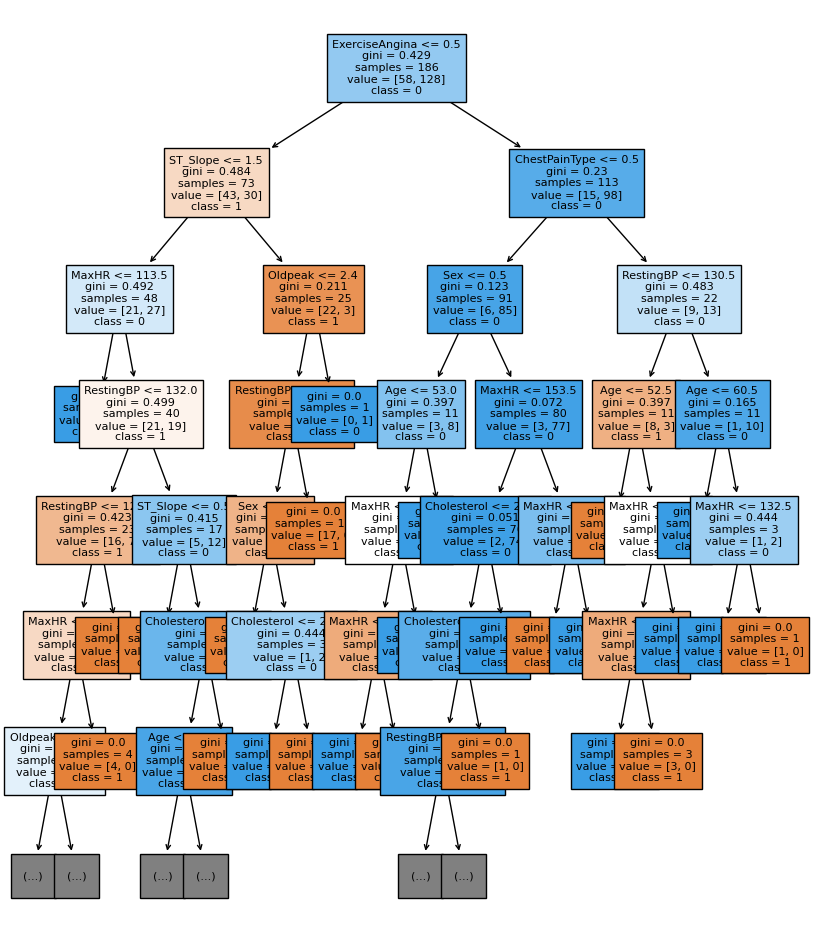

In [87]:
plt.figure(figsize=(10,12))
a=plot_tree(dt,max_depth=6,fontsize=8,feature_names=feature_name,class_names=cn,filled=True)
plt.show()

## 3. Knn Algorithm 

In [88]:
from sklearn.neighbors import KNeighborsClassifier

In [89]:
model_Knn=KNeighborsClassifier(n_neighbors=5)

In [90]:
model_Knn.fit(x_train,y_train)

KNeighborsClassifier()

In [91]:
y_predKnn=model_Knn.predict(x_test)

In [92]:
accuracy_score(y_predKnn,y_test)

0.7625

In [93]:
confusion_matrix(y_predKnn,y_test)

array([[ 7,  9],
       [10, 54]], dtype=int64)

In [94]:
accuracy=[]
for i in range(5,101,3):
    if(i%2!=0):
        model_Knn=KNeighborsClassifier(n_neighbors=i)
        model_Knn.fit(x_train,y_train)
        y_predKnn=model_Knn.predict(x_test)
        accuracy_score(y_predKnn,y_test)
        accuracy.append(accuracy_score(y_predKnn,y_test))
        print("Value of K",i,"and corresponding accuracy",accuracy_score(y_predKnn,y_test))

print("\n")
print("Maximum accuracy is",max(accuracy))

Value of K 5 and corresponding accuracy 0.7625
Value of K 11 and corresponding accuracy 0.8
Value of K 17 and corresponding accuracy 0.775
Value of K 23 and corresponding accuracy 0.7875
Value of K 29 and corresponding accuracy 0.775
Value of K 35 and corresponding accuracy 0.8125
Value of K 41 and corresponding accuracy 0.8
Value of K 47 and corresponding accuracy 0.8
Value of K 53 and corresponding accuracy 0.7875
Value of K 59 and corresponding accuracy 0.7875
Value of K 65 and corresponding accuracy 0.8
Value of K 71 and corresponding accuracy 0.7875
Value of K 77 and corresponding accuracy 0.7875
Value of K 83 and corresponding accuracy 0.7875
Value of K 89 and corresponding accuracy 0.7875
Value of K 95 and corresponding accuracy 0.7875


Maximum accuracy is 0.8125


In [95]:
precision_score(y_test,y_predKnn)

0.7875

In [96]:
recall_score(y_test,y_predKnn)

1.0

Text(0, 0.5, 'Accuracy')

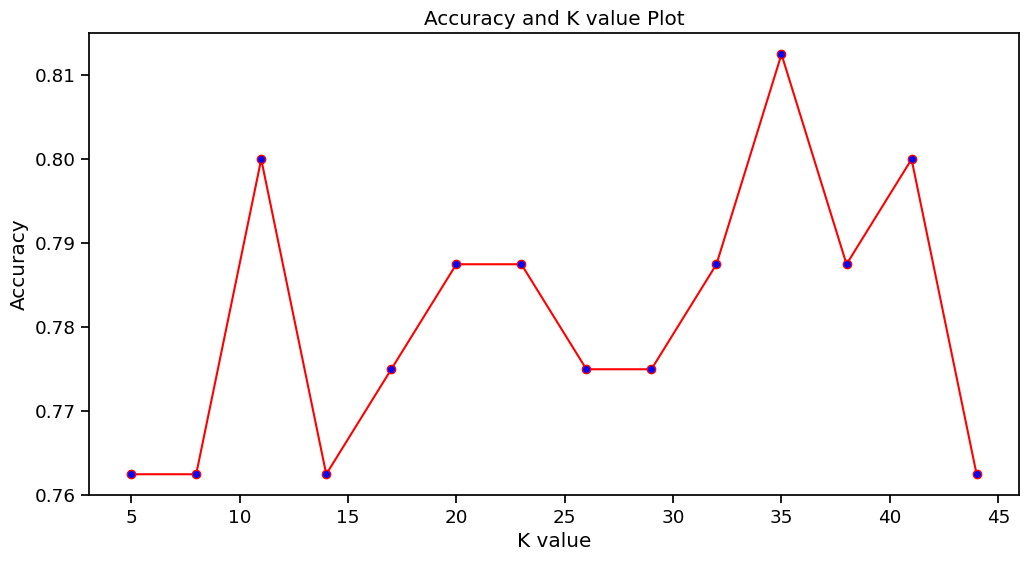

In [97]:
accuracy=[]
for i in range(5,45,3):
    model_Knn=KNeighborsClassifier(n_neighbors=i)
    model_Knn.fit(x_train,y_train)
    y_predKnn=model_Knn.predict(x_test)
    accuracy_score(y_predKnn,y_test)
    accuracy.append(accuracy_score(y_predKnn,y_test))

plt.figure(figsize=(12,6))
plt.plot(range(5,45,3),accuracy,color="r",linestyle="-",marker="o",markerfacecolor="blue")
plt.title("Accuracy and K value Plot")
plt.xlabel("K value")
plt.ylabel("Accuracy")

## 4. Naive Bayes 

In [98]:
from sklearn.naive_bayes import GaussianNB

In [99]:
model_NB = GaussianNB()

In [100]:
model_NB.fit(x_train,y_train)

GaussianNB()

In [101]:
y_predNB=model_NB.predict(x_test)

In [102]:
accuracy_score(y_test,y_predNB)

0.875

In [103]:
confusion_matrix(y_test,y_predNB)

array([[12,  5],
       [ 5, 58]], dtype=int64)

In [104]:
Random_State=[]
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=i)
    model_NB=GaussianNB()
    model_NB.fit(x_train,y_train)
    y_predNB=model_NB.predict(x_test)
    Random_State.append(accuracy_score(y_test,y_predNB))
    random_no=Random_State.index(max(Random_State))
    accuracy=max(Random_State)
    
print("Random State Number :",random_no,"Accuracy_score :",accuracy)    

Random State Number : 42 Accuracy_score : 0.925


In [105]:
precision_score(y_test,y_predNB)

0.9206349206349206

In [106]:
recall_score(y_test,y_predNB)

0.9206349206349206

## 5. SVC

In [107]:
from sklearn.svm import SVC

In [108]:
model_sv=SVC()

In [109]:
model_sv.fit(x_train,y_train)

SVC()

In [110]:
y_predsv=model_sv.predict(x_test)

In [111]:
Random_State=[]
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=i)
    model_sv=SVC()
    model_sv.fit(x_train,y_train)
    y_predsv=model_sv.predict(x_test)
    Random_State.append(accuracy_score(y_test,y_predsv))
    random_no=Random_State.index(max(Random_State))
    accuracy=max(Random_State)
    
print("Random State Number :",random_no,"Accuracy_score :",accuracy)    

Random State Number : 71 Accuracy_score : 0.8125


In [112]:
precision_score(y_test,y_predsv)

0.7875

In [113]:
recall_score(y_test,y_predsv)

1.0

## 6. Random Forest Classifier 

In [114]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
model_rf=RandomForestClassifier()

In [116]:
model_rf.fit(x_train,y_train)

RandomForestClassifier()

In [117]:
y_predrf=model_rf.predict(x_test)

In [118]:
Random_State=[]
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=i)
    model_rf=GaussianNB()
    model_rf.fit(x_train,y_train)
    y_predrf=model_rf.predict(x_test)
    Random_State.append(accuracy_score(y_test,y_predrf))
    random_no=Random_State.index(max(Random_State))
    accuracy=max(Random_State)
    
print("Random State Number :",random_no,"Accuracy_score :",accuracy)    

Random State Number : 42 Accuracy_score : 0.925


In [119]:
precision_score(y_test,y_predrf)

0.9206349206349206

In [120]:
recall_score(y_test,y_predrf)

0.9206349206349206

## 7. Gradient Boosting 

In [121]:
from sklearn.ensemble import GradientBoostingClassifier

In [122]:
model_gb=GradientBoostingClassifier()

In [123]:
model_gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [124]:
y_predgb=model_gb.predict(x_test)

In [125]:
Random_State=[]
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=i)
    model_gb=GradientBoostingClassifier()
    model_gb.fit(x_train,y_train)
    y_predgb=model_gb.predict(x_test)
    Random_State.append(accuracy_score(y_test,y_predgb))
    random_no=Random_State.index(max(Random_State))
    accuracy=max(Random_State)
    
print("Random State Number :",random_no,"Accuracy_score :",accuracy)    

Random State Number : 71 Accuracy_score : 0.8875


In [126]:
precision_score(y_test,y_predgb)

0.921875

In [127]:
recall_score(y_test,y_predgb)

0.9365079365079365

In [128]:
dct={"Models":["Logistic Regression","Decision Tree ","Knn","Naive_bayes","SVM","Random Forest","Gradient Boosting"],
"Accuracy_Score":[ 0.9125 , 0.8375 ,0.8125 , 0.925,0.8125,0.925,0.8875],
"Precision_Score":[0.9117647058823529 ,0.8333333333333334 ,0.7875 , 0.9206349206349206 ,0.7875 ,0.9206349206349206, 0.921875],
"Recall_Score":[ 0.9841269841269841 , 0.7936507936507936, 1.0 ,0.9206349206349206 ,1.0,0.9206349206349206,0.9365079365079365]}
DF=pd.DataFrame(dct)
DF

,Models,Accuracy_Score,Precision_Score,Recall_Score
0,Logistic Regression,0.9125,0.911765,0.984127
1,Decision Tree,0.8375,0.833333,0.793651
2,Knn,0.8125,0.787500,1.000000
3,Naive_bayes,0.9250,0.920635,0.920635
4,SVM,0.8125,0.787500,1.000000
5,Random Forest,0.9250,0.920635,0.920635
6,Gradient Boosting,0.8875,0.921875,0.936508


#### - *So here, Naive Bayes algorithm and Random Forest Classifier algorithm gives same Accuracy,Precision and Recall Score which is 0.9250, 0.920635, 0.920635 resp.*

#### *We choose random one of them i.e Random Forest Classifier algorithm for prediction*

In [131]:
Age=int(input("Enter the Age:"))
Sex=int(input("Enter the Sex:"))
ChestPainType=int(input("Enter the ChestPainType:"))
RestingBP=int(input("Enter the RestingBP:"))
Cholesterol=int(input("Enter the Cholesterol:"))
FastingBS=int(input("Enter the FastingBS:"))
RestingECG=int(input("Enter the RestingECG:"))
MaxHR=int(input("Enter the MaxHR:"))
ExerciseAngina=int(input("Enter the ExerciseAngina:"))
Oldpeak=int(input("Enter the Oldpeak:"))
ST_Slope=int(input("Enter the ST_Slope:"))
pred=model_rf.predict([[Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS,
       RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope]])
print(pred)
if pred==1:
    print("Person Have Heart Diseases")
else:
    print("Person has good health")

Enter the Age:48
Enter the Sex:0
Enter the ChestPainType:0
Enter the RestingBP:138
Enter the Cholesterol:214
Enter the FastingBS:0
Enter the RestingECG:1
Enter the MaxHR:108
Enter the ExerciseAngina:1
Enter the Oldpeak:1
Enter the ST_Slope:1
[1]
Person Have Heart Diseases
